![This is an image](Quant-Trading.jpg)

<font size="3">
Please visit our website <a href="https://www.quant-trading.co" target="_blank">quant-trading.co</a> for more tools on quantitative finance and data science.
</font>

In [1]:
import warnings
warnings.filterwarnings('ignore')


from pandas_datareader import wb
import datetime
import geopandas as gpd
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import branca
import folium

## **¿How to visualize geographical data?**


<font size="3"> The World Bank has one of the most comprehensive database about economic and social variables for countries. In this notebook you can find an example on how to visualize this data in a map. Please remember that we explained in great detail how to download ths information from the API in this <a href="https://quant-trading.co/how-to-download-data-from-world-bank-api/" target="_blank">notebook</a> <br><br>
    
<font size="3"> GeoPandas is an open source project to make working with geospatial data in python easier. GeoPandas extends the datatypes used by pandas to allow spatial operations on geometric types. Geometric operations are performed by shapely. Geopandas further depends on fiona for file access and matplotlib for plotting. We will use the GeopandasDataFrame object. A GeoDataFrame object is a pandas.DataFrame that has a column with geometry. <br><br>

## **Download countries coordinates**


<font size="3"> From the Geopandas Library we can dowload a dataset called "natural earth lowres" that contains information about the names of most countries in our planet and also their geografic limits. The latter is stored in the field "geometry" as you can see below. GeoPandas has three basic classes of geometric objects (which are actually shapely objects):

- Points / Multi-Points

- Lines / Multi-Lines

- Polygons / Multi-Polygons  
    
Each entry may consist of only one shape (like a single polygon) or multiple shapes that are meant to be thought of as one observation (like the many polygons that make up the State of Hawaii or a country like Indonesia).<br><br>

In [2]:
#Get all countries coordinates from geopandas
countries_coordinates = gpd.read_file(gpd.datasets.get_path("naturalearth_lowres"))

In [3]:
countries_coordinates.iloc[10:18]

,pop_est,continent,name,iso_a3,gdp_md_est,geometry
10,18952038.0,South America,Chile,CHL,282318,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335..."
11,86790567.0,Africa,Dem. Rep. Congo,COD,50400,"POLYGON ((29.34000 -4.49998, 29.51999 -5.41998..."
12,10192317.3,Africa,Somalia,SOM,4719,"POLYGON ((41.58513 -1.68325, 40.99300 -0.85829..."
13,52573973.0,Africa,Kenya,KEN,95503,"POLYGON ((39.20222 -4.67677, 37.76690 -3.67712..."
14,42813238.0,Africa,Sudan,SDN,30513,"POLYGON ((24.56737 8.22919, 23.80581 8.66632, ..."
15,15946876.0,Africa,Chad,TCD,11314,"POLYGON ((23.83766 19.58047, 23.88689 15.61084..."
16,11263077.0,North America,Haiti,HTI,14332,"POLYGON ((-71.71236 19.71446, -71.62487 19.169..."
17,10738958.0,North America,Dominican Rep.,DOM,88941,"POLYGON ((-71.70830 18.04500, -71.68774 18.316..."


## **Object type**


<font size="3"> The DataFrame we just downloaded is a GeoDataFrame as you can observe below<br><br>

In [4]:
type(countries_coordinates)

geopandas.geodataframe.GeoDataFrame

## **Geometry**


<font size="3"> We can further explore what we have in the column geometry. Here you can see that we have a vector of tuples. Each point of the tuple is a coordinate. A coordinate system is an arrangement of reference lines or curves used to identify the location of points in space. In two dimensions, the most common system is the Cartesian (after René Descartes) system. Points are designated by their distance along a horizontal (x) and vertical (y) axis from a reference point, the origin, designated (0, 0). This is called latitude and longitude. Every single point on the surface of earth can be specified by the latitude and longitude coordinates. Therefore, by using latitude and longitude we can specify virtually any point on earth.<br><br>

In [5]:
print(countries_coordinates['geometry'].iloc[1])

POLYGON ((33.90371119710453 -0.9500000000000001, 34.07261999999997 -1.0598199999999451, 37.69868999999994 -3.0969899999999484, 37.7669 -3.6771200000000004, 39.20222 -4.67677, 38.74053999999995 -5.9089499999999475, 38.79977000000008 -6.475660000000005, 39.44 -6.839999999999861, 39.47000000000014 -7.099999999999966, 39.19468999999998 -7.703899999999976, 39.25203000000005 -8.00780999999995, 39.18652000000009 -8.48550999999992, 39.53574000000009 -9.112369999999885, 39.94960000000003 -10.098400000000026, 40.316586229110854 -10.317097752817492, 40.31659000000002 -10.317099999999868, 39.52099999999996 -10.89688000000001, 38.42755659358775 -11.285202325081656, 37.827639999999974 -11.26878999999991, 37.471289999999954 -11.568759999999997, 36.775150994622805 -11.594537448780805, 36.51408165868426 -11.720938002166735, 35.31239790216904 -11.439146416879147, 34.55998904799935 -11.520020033415925, 34.27999999999997 -10.160000000000025, 33.940837724096525 -9.693673841980285, 33.73972000000009 -9.4171

## **Geometry visualization**


<font size="3"> If we just write the code below, we get a sense on how the map of each country looks like<br><br>

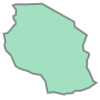

In [6]:
countries_coordinates['geometry'].iloc[1]

## **Download information from the WorldBank Database**


<font size="3"> Now we can download the information from the WorldBank Database. First we define the dates parameters and the we download the DataFrame "countries" which contains important information abour the countries, like their iso2c code. That will be useful to filter specific countries we would like to search<br><br>

In [7]:
#Dates parameters
start = datetime.datetime(1960, 12, 31)
end = datetime.datetime(2023, 12, 31)

#Get all countries basic info
countries = wb.get_countries()
countries

,iso3c,iso2c,name,region,adminregion,incomeLevel,lendingType,capitalCity,longitude,latitude
0,ABW,AW,Aruba,Latin America & Caribbean,,High income,Not classified,Oranjestad,-70.0167,12.5167
1,AFE,ZH,Africa Eastern and Southern,Aggregates,,Aggregates,Aggregates,,NaN,NaN
2,AFG,AF,Afghanistan,South Asia,South Asia,Low income,IDA,Kabul,69.1761,34.5228
3,AFR,A9,Africa,Aggregates,,Aggregates,Aggregates,,NaN,NaN
4,AFW,ZI,Africa Western and Central,Aggregates,,Aggregates,Aggregates,,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...
291,XZN,A5,Sub-Saharan Africa excluding South Africa and ...,Aggregates,,Aggregates,Aggregates,,NaN,NaN
292,YEM,YE,"Yemen, Rep.",Middle East & North Africa,Middle East & North Africa (excluding high inc...,Low income,IDA,Sana'a,44.2075,15.3520
293,ZAF,ZA,South Africa,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Upper middle income,IBRD,Pretoria,28.1871,-25.7460
294,ZMB,ZM,Zambia,Sub-Saharan Africa,Sub-Saharan Africa (excluding high income),Lower middle income,IDA,Lusaka,28.2937,-15.3982


In [8]:
#Make dataframe of a variable - in this case GDP per capita

variable = 'NY.GDP.PCAP.CD'
description = 'GDP per capita (current US$)'

variable_countries_df = wb.download(indicator = variable, 
                               start=start,end=end,
                               country=['BR','CO','MX','CL','PE','AR','BO','EC','NI','PY','UY','VE','PA','CR','HN','SV','GT','SR','GY'] )

variable_countries_df.reset_index(inplace=True)
variable_countries_df

,country,year,NY.GDP.PCAP.CD
0,Argentina,2023,NaN
1,Argentina,2022,13650.604629
2,Argentina,2021,10650.860460
3,Argentina,2020,8500.837939
4,Argentina,2019,9963.674162
...,...,...,...
1211,"Venezuela, RB",1964,874.199411
1212,"Venezuela, RB",1963,1060.570324
1213,"Venezuela, RB",1962,1006.879977
1214,"Venezuela, RB",1961,954.355361


## **Object type**


<font size="3"> The DataFrame we just downloaded is a simple DataFrame as you can observe below<br><br>

In [9]:
type(variable_countries_df)

pandas.core.frame.DataFrame

## **Merge DataFrames**


<font size="3"> The next step we are about to perform is to merge the DataFrames we downloaded. First we merge the variable_countries, which contains the variable of interest which is this case is GDP per capita of some Latin American countries, with the DataFrame countries. Then we merge the resulting DataFrame with the GeoDataFrame "contries_coordinates". In this way we get the "df_TOTAL" DataFrame with the information of the GDP per capita for each country, but also its geometry. We are ready to plot a Geographical chart"<br><br>

In [10]:
#Create a dataframe with the coordinates for each country to make georeference chart

df_TOTAL = pd.merge(variable_countries_df,countries[['name','iso3c']],left_on='country',right_on='name',how='left')
df_TOTAL = pd.merge(countries_coordinates[['iso_a3','geometry']],df_TOTAL,left_on='iso_a3',right_on='iso3c',how='left')
df_TOTAL.dropna(inplace=True)
df_TOTAL

,iso_a3,geometry,country,year,NY.GDP.PCAP.CD,name,iso3c
10,ARG,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",Argentina,2022,13650.604629,Argentina,ARG
11,ARG,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",Argentina,2021,10650.860460,Argentina,ARG
12,ARG,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",Argentina,2020,8500.837939,Argentina,ARG
13,ARG,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",Argentina,2019,9963.674162,Argentina,ARG
14,ARG,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",Argentina,2018,11795.162745,Argentina,ARG
...,...,...,...,...,...,...,...
1344,PRY,"POLYGON ((-58.16639 -20.17670, -57.87067 -20.7...",Paraguay,1969,236.205874,Paraguay,PRY
1345,PRY,"POLYGON ((-58.16639 -20.17670, -57.87067 -20.7...",Paraguay,1968,224.881062,Paraguay,PRY
1346,PRY,"POLYGON ((-58.16639 -20.17670, -57.87067 -20.7...",Paraguay,1967,219.075346,Paraguay,PRY
1347,PRY,"POLYGON ((-58.16639 -20.17670, -57.87067 -20.7...",Paraguay,1966,212.157758,Paraguay,PRY


## **Object type**


<font size="3"> You can observe that the DataFrame we just built is a GeoDataFrame<br><br>

In [11]:
type(df_TOTAL)

geopandas.geodataframe.GeoDataFrame

## **Filter for a specific year**


<font size="3"> We can apply a filter to have only information for a particular year. In this case we are using the information for 2022<br><br>

In [12]:
df_TOTAL_YEAR =  df_TOTAL.loc[df_TOTAL['year']=='2022']
df_TOTAL_YEAR

,iso_a3,geometry,country,year,NY.GDP.PCAP.CD,name,iso3c
10,ARG,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",Argentina,2022,13650.604629,Argentina,ARG
74,CHL,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...",Chile,2022,15355.479740,Chile,CHL
154,MEX,"POLYGON ((-117.12776 32.53534, -115.99135 32.6...",Mexico,2022,11496.522872,Mexico,MEX
218,URY,"POLYGON ((-57.62513 -30.21629, -56.97603 -30.1...",Uruguay,2022,20795.042354,Uruguay,URY
282,BRA,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...",Brazil,2022,8917.674911,Brazil,BRA
346,BOL,"POLYGON ((-69.52968 -10.95173, -68.78616 -11.0...",Bolivia,2022,3600.121635,Bolivia,BOL
410,PER,"POLYGON ((-69.89364 -4.29819, -70.79477 -4.251...",Peru,2022,7125.829931,Peru,PER
474,COL,"POLYGON ((-66.87633 1.25336, -67.06505 1.13011...",Colombia,2022,6624.165393,Colombia,COL
538,PAN,"POLYGON ((-77.35336 8.67050, -77.47472 8.52429...",Panama,2022,17357.628634,Panama,PAN
602,CRI,"POLYGON ((-82.54620 9.56613, -82.93289 9.47681...",Costa Rica,2022,13365.356399,Costa Rica,CRI


## **Make a new category field**


<font size="3"> We create a category field. This can help us to group the countries and get a better chart. In this case we are grouping the contries in 5 categories depending on the GDP per capita<br><br>

In [13]:
df_TOTAL_YEAR['Cat'] = np.nan


conditions = [ (df_TOTAL_YEAR[variable] >= 0)&(df_TOTAL_YEAR[variable] < 3000) , 
               (df_TOTAL_YEAR[variable] >= 3000)&(df_TOTAL_YEAR[variable] < 6000) , 
               (df_TOTAL_YEAR[variable] >= 6000)&(df_TOTAL_YEAR[variable] < 9000) , 
               (df_TOTAL_YEAR[variable] >= 9000)&(df_TOTAL_YEAR[variable] < 12000),
               (df_TOTAL_YEAR[variable] >= 12000)]     

#choices = [1,2,3,4,5]
choices = ['0-3000', '3000-6000', '6000-9000', '9000-12000', '>12000']

df_TOTAL_YEAR['Cat'] = np.select(conditions, choices, default='null')


df_TOTAL_YEAR

,iso_a3,geometry,country,year,NY.GDP.PCAP.CD,name,iso3c,Cat
10,ARG,"MULTIPOLYGON (((-68.63401 -52.63637, -68.25000...",Argentina,2022,13650.604629,Argentina,ARG,>12000
74,CHL,"MULTIPOLYGON (((-68.63401 -52.63637, -68.63335...",Chile,2022,15355.479740,Chile,CHL,>12000
154,MEX,"POLYGON ((-117.12776 32.53534, -115.99135 32.6...",Mexico,2022,11496.522872,Mexico,MEX,9000-12000
218,URY,"POLYGON ((-57.62513 -30.21629, -56.97603 -30.1...",Uruguay,2022,20795.042354,Uruguay,URY,>12000
282,BRA,"POLYGON ((-53.37366 -33.76838, -53.65054 -33.2...",Brazil,2022,8917.674911,Brazil,BRA,6000-9000
346,BOL,"POLYGON ((-69.52968 -10.95173, -68.78616 -11.0...",Bolivia,2022,3600.121635,Bolivia,BOL,3000-6000
410,PER,"POLYGON ((-69.89364 -4.29819, -70.79477 -4.251...",Peru,2022,7125.829931,Peru,PER,6000-9000
474,COL,"POLYGON ((-66.87633 1.25336, -67.06505 1.13011...",Colombia,2022,6624.165393,Colombia,COL,6000-9000
538,PAN,"POLYGON ((-77.35336 8.67050, -77.47472 8.52429...",Panama,2022,17357.628634,Panama,PAN,>12000
602,CRI,"POLYGON ((-82.54620 9.56613, -82.93289 9.47681...",Costa Rica,2022,13365.356399,Costa Rica,CRI,>12000


## **Plot the map**


<font size="3"> We can use the function plot directly on the GeoDataFrame to get the geographical map or chart. Below we show an example on how to do that<br><br>

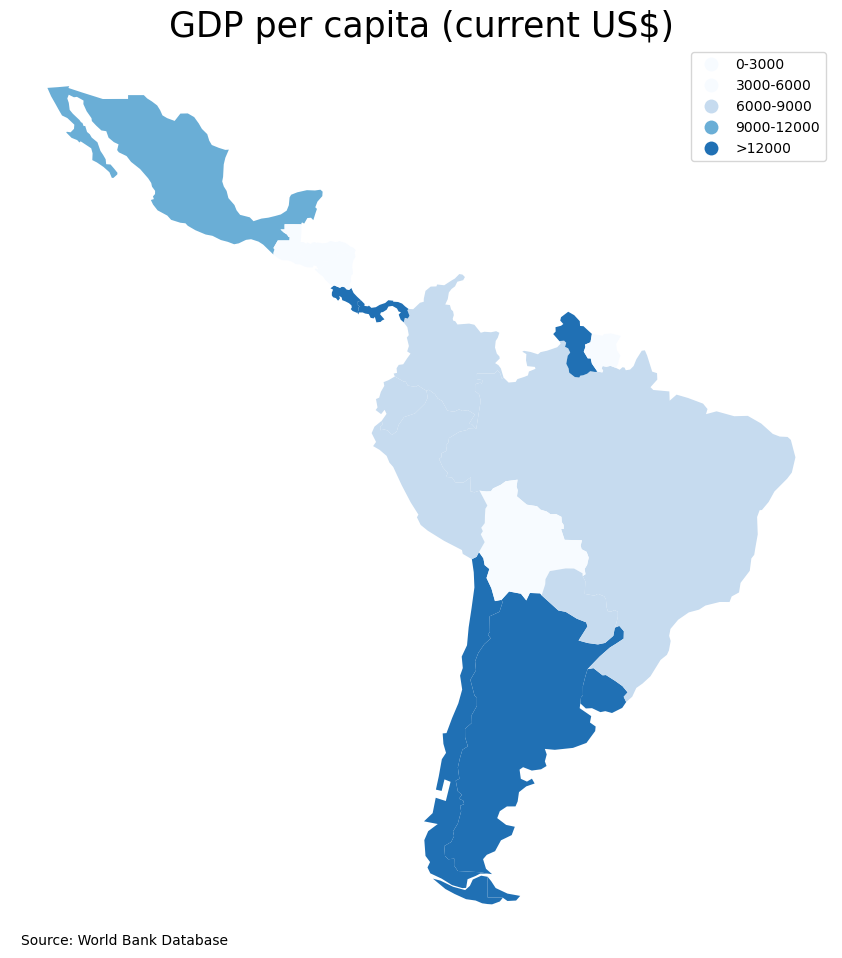

In [14]:
vmin, vmax = 1, 5

fig = df_TOTAL_YEAR.plot(column='Cat',figsize=(15,10),legend=True,cmap='Blues',vmin=vmin, vmax=vmax, norm=plt.Normalize(vmin=vmin, vmax=vmax))

fig.axis('off')
fig.set_title(description, fontdict={'fontsize': '25','fontweight' : '3'})
plt.subplots_adjust(bottom=0.1, right=1.0, top=1.0)

plt.text(-120,-60,'Source: World Bank Database')

plt.box(on=None)
plt.show()

## **Another way to create the map**


<font size="3"> We can also use the Branca and Folium libraries to create this type of charts. Below is an example on how to do that <br><br>

In [15]:
colormap = branca.colormap.LinearColormap(colors=['white','dodgerblue','royalblue','blue','darkblue'],vmin=0,vmax=15000)
mapa = folium.Map()

style_function = lambda x: {'fillColor': colormap(x['properties'][variable]),'color':'black','weight':1,'fillOpacity':0.4}

stategeo = folium.GeoJson(df_TOTAL_YEAR.to_json(), name = 'geometry',style_function=style_function,
                          tooltip=folium.GeoJsonTooltip(fields=['country',variable],aliases=['country',variable],localize=True)).add_to(mapa)

colormap.add_to(mapa)
mapa

If this content is helpful and you want to make a donation please click on the button below. It helps us maintain this site.

[![paypal](https://www.paypalobjects.com/en_US/i/btn/btn_donateCC_LG.gif)](https://www.paypal.com/cgi-bin/webscr?cmd=_s-xclick&hosted_button_id=29CVY97MEQ9BY)